**Quais fatores influenciam no preço de um imóvel ?**

**Introdução**

Dizem que um dos maiores sonhos dos brasileiros é ter o seu próprio imóvel,para que se possa ter um cantinho para chamar de seu,para que deixe o imóvel conforme quiser,e também sair do aluguel . Porém,para que esse sonho seja realizado,há um preço,muitas vezes alto demais,então nesse projeto pode-se propor a responder a seguinte pergunta,quais fatores influenciam no preço de um imóvel no país ? Será que fatores como localidade,número de quartos e de banheiros,presença ou não de jardim,etc influenciam ? E se sim,o quanto influenciam ? Nesse projeto,será analisado o banco de dados "dataZAP.csv",que contém  informações sobre imóveis vendidos na plataforma ZAP,e será respondido com análise exploratória as seguintes perguntas  :

Qual a relação do preço de imóvel com as características número de quartos,de banheiros,área utilizável ?

Quais são as cidades com o maior preço médio para a compra de imóvel ? E quais são as mais baratas ?

Quais são os estados com o maior preço médio para a compra do imóvel ? E quais são os mais baratos ?
 
Existe diferença significativa no preço médio dos imóveis com jardim e os sem jardim ? Existe diferença significativa no preço dos imóveis com sauna e os sem sauna ? 

Primeiramente,pode-se conhecer o banco de dados "dataZap",observando-se as 5 primeiras linhas . 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
dados=pd.read_csv("dataZAP.csv",delimiter=";",low_memory=False)
dados.head()

,account.licenseNumber,account.name,imvl_type,listing.acceptExchange,listing.address.city,listing.address.confidence,listing.address.country,listing.address.level,listing.address.neighborhood,listing.address.point.lat,...,listing.title,listing.totalAreas,listing.unitFloor,listing.unitSubTypes,listing.unitTypes,listing.unitsOnTheFloor,listing.updatedAt,listing.usableAreas,listing.usageTypes,type
0,04268-J-SP,ADI Assessoria e Imóveis Ltda,apartamentos,False,São Paulo,VALID_STREET,BR,STREET,Parada Inglesa,-23.493796,...,SãO PAULO - Apartamento Padrão - Parada Inglesa,45,0,normal,APARTMENT,0,2020-07-24T05:06:08.843Z,45,RESIDENTIAL,superPremium
1,00254-J-SC,San Remos Imóveis,apartamentos,False,Florianópolis,VALID_STREET,BR,STREET,Agronômica,-27.576887,...,Florianópolis - Apartamento Padrão - Agronômica,140,0,normal,APARTMENT,0,2020-07-12T11:43:29.976Z,140,RESIDENTIAL,superPremium
2,48861-F-RJ,Família Bacellar Imobiliária,apartamentos,False,Rio de Janeiro,VALID_STREET,BR,STREET,Recreio Dos Bandeirantes,-23.018798,...,Rio de Janeiro - Apartamento Padrão - Recreio ...,100,0,normal,APARTMENT,0,2020-07-30T03:11:32.521Z,100,RESIDENTIAL,superPremium
3,17452-J-SP,Next Soluções Imobiliárias,apartamentos,False,Campinas,VALID_STREET,BR,STREET,Cambuí,-22.899193,...,Campinas - Apartamento Padrão - Cambuí,80,0,normal,APARTMENT,0,2020-07-16T17:15:06.708Z,80,RESIDENTIAL,premium
4,24344-J-SP,QUINTO ANDAR SERVICOS IMOBILIARIOS LTDA,apartamentos,False,São Paulo,VALID_STREET,BR,STREET,Ipiranga,-23.598672,...,São Paulo - Apartamento Padrão - Ipiranga,69,0,normal,APARTMENT,0,2020-07-29T04:32:26.854Z,69,RESIDENTIAL,premium


Por fim,pode-se conhecer em quantas colunas e linhas o banco de dados possui com a função shape

In [2]:
dados.shape

(35772, 78)

Com o resultado da função shape,pode-se observar que o banco de dados é composto por 35772 observações e 78 variáveis . Porém,nem todas as observações serão analisadas,pois para que se cumpra o objetivo do estudo,terei que filtrar apenas as observações que estão a venda,isso será feito selecionando os resultados da variável "listing.pricingInfo.isSale" que sejam "True" . E então pode-se observar novamente com quantas observações o banco de dados terá . 

In [3]:
dadosvenda=dados[dados["listing.pricingInfo.isSale"]==True]
#Removendo linhas duplicadas 
dadosvenda=dadosvenda.drop_duplicates()
dadosvenda.shape

(6561, 78)

É possivel notar que ao se aplicar o filtro,e remover as linhas duplidas,o banco de dados é  composto por 6561 observações,e 78 variáveis . Porém,pode-se descartar a maioria das variáveis,selecionando apenas as que serão relevantes para responder as perguntas iniciais da análise . Em seguida,as variáveis selecionadas serão renomeadas para o português para que fique mais claro a interpretação dos resultados da análise  .

In [4]:
dadosvenda=dadosvenda[["listing.pricingInfo.salePrice","listing.address.city","listing.address.state","listing.bathrooms","listing.bedrooms","listing.garden","listing.usableAreas","listing.sauna","imvl_type","listing.parkingSpaces"]]
dadosvenda.columns=["PrecoDeVenda","CidadeDoImovel","EstadoDoImovel","NumeroDeBanheiros","NumeroDeQuartos","Jardim","AreaUtilizavel","Sauna","TipoDoImovel","VagasDeEstacionamento"]

**Descrição das variáveis**: 

PrecoDeVenda(listing.pricingInfo.salePrice)= Preço de venda do imóvel

CidadeDoImovel(listing.address.city)= Cidade em que está localizado o imóvel 

EstadoDoImovel(listing.address.state) = Estado onde está localizado o imóvel

NumeroDeBanheiros(listing.bathrooms) = Número de banheiros no imóvel 

NumeroDeQuartos(listing.bedrooms) = Número de quartos no imóvel 

Jardim(listing.garden) = Indica se o imóvel possue jardim,nos níveis True=Possui e False=Não Possui

AreaUtilizavel(listing.usableAreas)  = Área utilizável do imóvel 

Sauna(listing.sauna) = Indica se o imóvel possui sauna,nos níveis True=Possui e False=Não Possui 

TipoDoImovel(imvl_type) = Tipo do imóvel

VagasDeEstacionamento(listing.parkingSpaces) = Indica o número de vagas de estacionamento   

Será que as as variáveis estão em um tipo adequado para que se possa ser analisada,ou será que vai ser necessária alguma transformação ? Pode-se aplicar dtype para verificar 

In [5]:
dadosvenda.dtypes

PrecoDeVenda             object
CidadeDoImovel           object
EstadoDoImovel           object
NumeroDeBanheiros        object
NumeroDeQuartos           int64
Jardim                     bool
AreaUtilizavel           object
Sauna                      bool
TipoDoImovel             object
VagasDeEstacionamento    object
dtype: object

As variáveis PrecoDeVenda,NumeroDeBanheiros,AreaUtilizavel,VagasDeEstacionamento estão como objetos,porém para que se possa analisa-las tem-se que transformações para colunas do tipo numérico 

In [6]:
#Substituindo . por espaço para que se pudesse transformar a variável listing.pricingInfo.salePrice em um tipo numérico
dadosvenda.iloc[0:6561,0]=dadosvenda["PrecoDeVenda"].str.replace('.','')
#Transformando a variável PrecoDeVenda em um tipo numérico
dadosvenda.iloc[0:6561,0]=pd.to_numeric(dadosvenda["PrecoDeVenda"])
#Transformando a variavel NumeroDeBanheiros
dadosvenda["NumeroDeBanheiros"]=pd.to_numeric(dadosvenda["NumeroDeBanheiros"])
#Transformando a variável AreaUtilizavel
dadosvenda["AreaUtilizavel"]=pd.to_numeric(dadosvenda["AreaUtilizavel"])

Logo,após transformações como remover linhas duplicadas,selecionar apenas as variáveis relevantes para o estudo,filtrar observações onde o imóvel está a venda,temos agora 6561 observações e 10 variáveis . Agora pode-se analisar as 5 primeiras linhas para verificar como os dados estão .

In [7]:
dadosvenda.head()

,PrecoDeVenda,CidadeDoImovel,EstadoDoImovel,NumeroDeBanheiros,NumeroDeQuartos,Jardim,AreaUtilizavel,Sauna,TipoDoImovel,VagasDeEstacionamento
25,449000,Santo André,São Paulo,2,3,False,117,False,apartamentos,2
92,600000,Americana,São Paulo,3,3,False,90,False,apartamentos,2
97,1680000,Jundiaí,São Paulo,4,3,False,216,True,apartamentos,3
98,985000,São Paulo,São Paulo,4,3,False,139,False,apartamentos,3
116,580000,Americana,São Paulo,3,3,False,90,False,apartamentos,2


Então,para as variáveis quantitativas PrecoDeVenda,NumeroDeBanheiros,NumeroDeQuartos,AreaUtilizavel pode-se se calcular as medidas sumárias . 

In [8]:
varquantitativas=dadosvenda[["PrecoDeVenda","NumeroDeBanheiros","NumeroDeQuartos","AreaUtilizavel"]]
varquantitativas.describe()

,PrecoDeVenda,NumeroDeBanheiros,NumeroDeQuartos,AreaUtilizavel
count,6.561000e+03,6561.000000,6561.000000,6561.000000
mean,1.965790e+06,3.428593,2.985216,260.246304
std,2.665236e+06,2.048899,1.219104,319.407730
min,7.000000e+04,0.000000,0.000000,0.000000
25%,5.400000e+05,1.000000,2.000000,86.000000
50%,1.200000e+06,3.000000,3.000000,212.000000
75%,2.500000e+06,5.000000,4.000000,365.000000
max,3.950000e+07,20.000000,8.000000,15704.000000


Ao se analisar as medidas sumárias,pode-se chegar a algumas conclusões . 75% dos imóveis tem uma valor de venda de até 2.5 milhões de reais,porém o valor máximo de um imóvel pode-se chegar até 39 milhões de reais,o que é um forte indicio que ocorra outliers na variável PrecoDeVenda ,outro forte indício que ocorra outliers nessa variável é que a mediana é bem menor,de cerca de 1 milhão e 200 mil,enquanto que a média é de 1 milhão e 970 mil,o que indica que valores extremos tem feito com que a média aumente significamente . Na variável NumeroDeBanheiros,pode-se suspeitar de presença de outliers também,pois 75% das casas tem até 5 banheiros,porém o número banheiros é de 20 . Para que se possa conhecer a distribuição dos dados e verificar possíveis outliers,pode-se construir um boxplot . 

Text(0.5, 1.0, 'Distruição área utilizável')

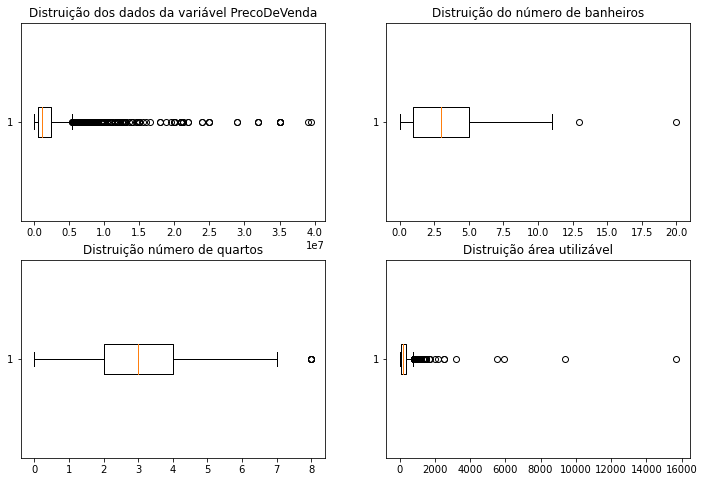

In [9]:
figure,axes=plt.subplots(2,2,figsize=(12,8))
axes[0,0].boxplot(varquantitativas["PrecoDeVenda"],vert=False)
axes[0,0].set_title("Distruição dos dados da variável PrecoDeVenda")
axes[0,1].boxplot(varquantitativas["NumeroDeBanheiros"],vert=False)
axes[0,1].set_title("Distruição do número de banheiros")
axes[1,0].boxplot(varquantitativas["NumeroDeQuartos"],vert=False)
axes[1,0].set_title("Distruição número de quartos")
axes[1,1].boxplot(varquantitativas["AreaUtilizavel"],vert=False)
axes[1,1].set_title("Distruição área utilizável")

Ao se observar os boxplots pode-se verificar que existem outliers em todas as variáveis,principalmente na variável "PrecoDeVenda" e "AreaUtilizavel",enquanto que nas variáveis "NumeroDeQuartos" e "NumeroDeBanheiros",aparentemente,tem poucos ou se encontram em determinados valores . Então calcularei o limite superior das variáveis quantitativas,verificarei quantas observações possuem outlier,e então decidirei se vou exclui-las .

In [14]:
iqr=2.500000e+06-5.400000e+05
media=varquantitativas["PrecoDeVenda"].mean()
limsuppreco=2.500000e+06+iqr*1.5
qtdoutliervenda=0
for i in varquantitativas["PrecoDeVenda"]:
     if(i>limsuppreco):
            qtdoutliervenda+=1
qtdoutliervenda
iqr=2
media=varquantitativas["NumeroDeQuartos"].mean()
limsupquarto=4+2*1.5
qtdoutlierquartos=0
for i in varquantitativas["NumeroDeQuartos"]:
     if(i>limsupquarto):
            qtdoutlierquartos+=1
qtdoutlierquartos
iqr=4
media=varquantitativas["NumeroDeBanheiros"].mean()
limsupbanheiro=5+4*1.5
qtdoutlierbanheiros=0
for i in varquantitativas["NumeroDeBanheiros"]:
     if(i>limsupbanheiro):
            qtdoutlierbanheiros+=1
qtdoutlierbanheiros
iqrarea=365-86
media=varquantitativas["AreaUtilizavel"].mean()
d=0
limsuparea=365+1.5*iqrarea
for i in varquantitativas["AreaUtilizavel"]:
    if(i>limsuparea):
        d+=1

        

137

A variável "PrecoDeVenda" possui 6.22% das observações com outlier,a variável AreaUtilizavel possui 2% observações outlier . As variáveis "NumeroDeQuartos" e "NumeroDeBanheiros" possuem,respectivamente,5 e 2 . Logo,por serem poucos,excluirei as observações outliers . 

In [28]:
#varquantitativasemoutlier=varquantitativas[(varquantitativas["AreaUtilizavel"]<limsuparea) & (varquantitativas["NumeroDeQuartos"]<limsupquarto) & (varquantitativas["PrecoDeVenda"]<limsuppreco) & (varquantitativas["NumeroDeBanheiros"]<limsupbanheiro) & (varquantitativa["listing.usableAreas"]<limsuparea)]
dadosvendasemoutlier=dadosvenda[(dadosvenda["AreaUtilizavel"]<limsuparea) & (dadosvenda["NumeroDeQuartos"]<limsupquarto) & (dadosvenda["PrecoDeVenda"]<limsuppreco) & (dadosvenda["NumeroDeBanheiros"]<limsupbanheiro)]
varquantitativasemoutlier=dadosvendasemoutlier[["AreaUtilizavel","NumeroDeQuartos","PrecoDeVenda","NumeroDeBanheiros"]]
varquantitativassemoutlier.shape

(6077, 4)

Portanto,o conjunto de dados filtrado é composto agora por 6007 linhas . Então,podemos calcular novamente as medidas descritivas das variáveis quantitativas . 

In [25]:
varquantitativassemoutlier.describe()

,PrecoDeVenda,NumeroDeBanheiros,NumeroDeQuartos,AreaUtilizavel
count,6.077000e+03,6077.000000,6077.000000,6077.000000
mean,1.451301e+06,3.266908,2.888761,224.935988
std,1.191089e+06,1.956365,1.180598,163.056731
min,7.000000e+04,0.000000,0.000000,0.000000
25%,5.000000e+05,1.000000,2.000000,78.000000
50%,1.050000e+06,3.000000,3.000000,198.000000
75%,2.100000e+06,5.000000,4.000000,340.000000
max,5.400000e+06,10.000000,6.000000,780.000000


Observa-se agora que na coluna "PrecoDeVenda" a média do imóvel se aproxima bem mais da mediana,o que é um indicio de que está ocorrendo uma melhor simetria no preço de venda,e ocorreu efeito semelhante nas variáveis "NumeroDeBanheiros" e "AreaUtilizavel" .
Finalmente,será possivel calcular a relação das características do imóvel com o seu preço . Essa medida será calcular a partir da correlação,onde uma correlação próxima de 1 indica que quando uma variável aumenta a outra variável aumenta proporcionalmente a outra,e o efeito contrário ocorre se o coeficiente de correlação for -1,ou seja,se uma variável aumenta a outra dimuniu proporcionalmente . Porém,vale frisar aquela famosa frase na Estatística "Correlação não implica causalidade" . 

In [26]:
varquantitativassemoutlier.corr()

,PrecoDeVenda,NumeroDeBanheiros,NumeroDeQuartos,AreaUtilizavel
PrecoDeVenda,1.000000,0.657518,0.586130,0.734643
NumeroDeBanheiros,0.657518,1.000000,0.753079,0.774059
NumeroDeQuartos,0.586130,0.753079,1.000000,0.760034
AreaUtilizavel,0.734643,0.774059,0.760034,1.000000


Ao se analisar os dados de correlação,pode-se observar que existe uma forte correlação(73.46%) da variável "PrecoDeVenda" com "AreaUtilizavel",o que indica que quanto maior a área utilizável do imóvel maior será o preço de venda . Além disso,existe uma correlação moderada da variável relacionada ao preço de venda com as variáveis relacionadas de número de quartos e NumeroDeBanheiros de,respectivamente, 58.61% e 65.75%,o que indica que de forma forma moderada quanto maior a quantidade de banheiros e quartos maior será o valor do imóvel . 
Quais outras características do imóvel influenciam no preço de venda do imóvel ? É possivel verificar agora como o tipo do imóvel influencia no preço . Primeiramente,será analisada como está as distribuição dos tipos do imóveis com um gráfico de pizza . 

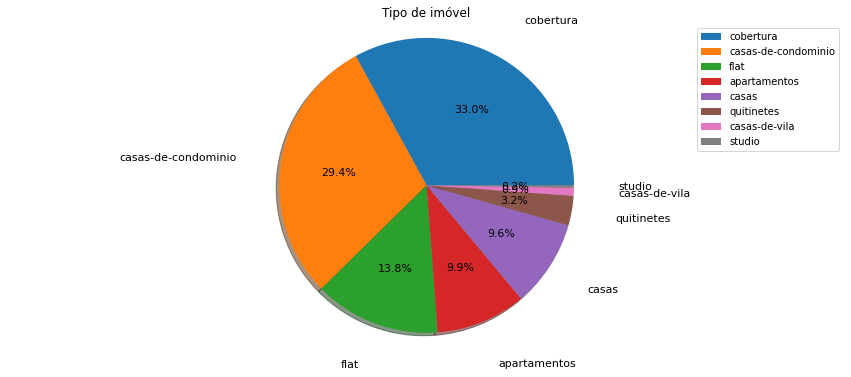

In [31]:
count=dadosvendasemoutlier["TipoDoImovel"].value_counts().values
tipo=dadosvendasemoutlier["TipoDoImovel"].value_counts().index
plt.figure(figsize=(15,6))
plt.pie(count,labels=list(tipo),labeldistance=1.3,textprops = {"fontsize": 11},shadow=True,autopct='%1.1f%%')
plt.title("Tipo de imóvel")
plt.axis("equal")
plt.legend()
plt.show()

Ao se analisar o gráfico de pizza é possivel observar que os dois tipos de imóveis que mais aparecem são cobertura e casas de condominio,com uma fatia de aproximadamente 62% dos imóveis . Enquanto que studio e casas de vila são os menos frequentes,com uma fatia de apenas 3.4% dos imóveis  . Pode-se,então calcular o tipo de imóvel para cada tipo,e então ilustrar em um gráfico de barras para verificar quais os mais caros e mais baratos . 

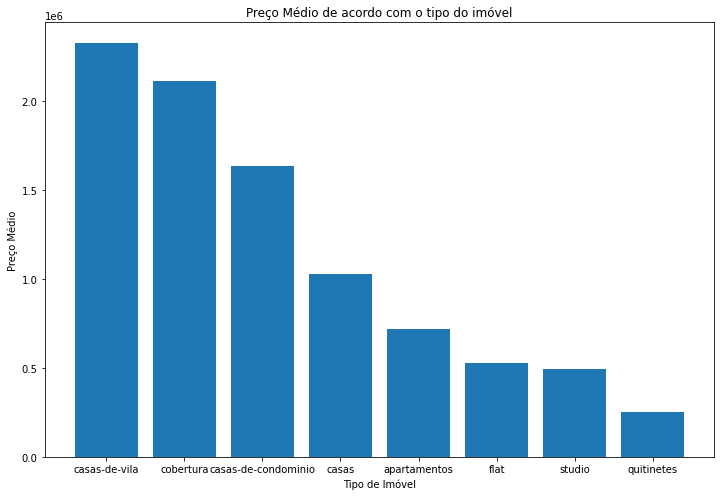

In [30]:
dadosportipo=dadosvendasemoutlier.groupby("TipoDoImovel")["PrecoDeVenda"].mean().sort_values(ascending=False).reset_index()
dadosportipo.columns=["Tipo De Imóvel","Preço Médio"]
tipo=dadosportipo["Tipo De Imóvel"]
preco=dadosportipo["Preço Médio"]
plt.figure(figsize=(12,8))
plt.bar(tipo,preco)
plt.xlabel("Tipo de Imóvel")
plt.ylabel("Preço Médio")
plt.title("Preço Médio de acordo com o tipo do imóvel")
plt.show()

Ao analisar o gráfico de "Preço médio de acordo com o tipo de imóvel " pode-se observar que casas de condominio e cobertura são os mais caros . Enquanto que quitinetes e studio tem um preço médio menor . Será que é devido a alta correlação da área utilizável com o preço do imóvel ? Possivilmente,pois conforme é conhecido,coberturas costumas serem grandes,e é de sabedoria popular que quitinetes e studio costumam ter uma área reduzida . 
Por fim,podemos verificar agora se o fator ter jardim no imóvel influencia no preço do imóvel,e se influencia,qual seria essa diferença . Pode-se assim como fiz com o tipo do imóvel construir primeiramente um gráfico de pizza para verificar quantos porcento possui e quantos não .

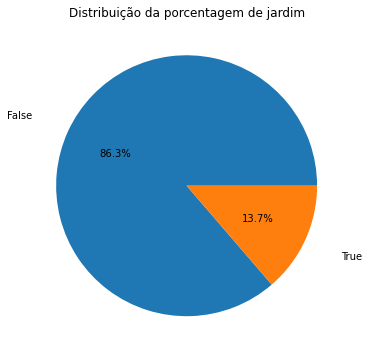

In [32]:
countjardim=dadosvendasemoutlier["Jardim"].value_counts().values
indexjardim=dadosvendasemoutlier["Jardim"].value_counts().index
plt.figure(figsize=(8,6))
plt.pie(countjardim,labels=indexjardim,labeldistance=1.3,autopct='%1.1f%%')
plt.title("Distribuição da porcentagem de jardim")
plt.show()

Sendo "False" não possuir jardim,pode-se observar que 86.3% dos imóveis não possuem . Então,visualizaremos agora através de um gráfico a diferença .

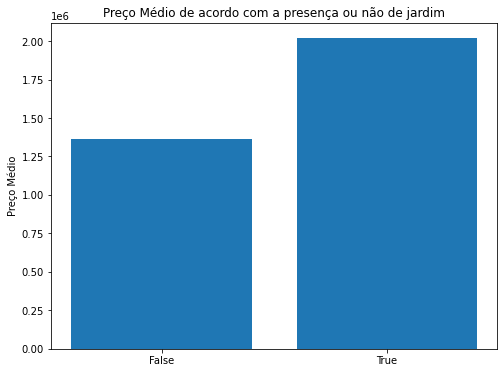

In [33]:
valormedio=dadosvendasemoutlier.groupby("Jardim")["PrecoDeVenda"].mean().reset_index()
valormedio.columns=["Jardim","Preço Médio"]
presencaounao=["False","True"]
preco=valormedio["Preço Médio"]
plt.figure(figsize=(8,6))
plt.bar(presencaounao,preco)
plt.title("Preço Médio de acordo com a presença ou não de jardim")
plt.ylabel("Preço Médio")
plt.show()

Através do gráfico de barras,verifica-se que o preço de venda média dos imóveis com jardim é consideravelmente maior do que os imóveis sem . Sendo o preço média dos que tem jardim de aproximadamente 2 milhões,e dos que não possui de 1 milhão e 361 mil,verifica-se que a diferença é bem expressiva . 
Por fim,outra característica do imóvel é a presença ou não de sauna . Primeiramente,verificarei quantos imóveis possuem sauna . 

In [37]:
dadosvendasemoutlier["Sauna"].value_counts()

False    5122
True      955
Name: Sauna, dtype: int64

Sendo "False" não possuir sauna,pode-se observar que de 6077,não possuem sauna 5122 imóveis ,o que representa cerca de 84.3% dos imóveis . Então,visualizarei a diferença de preço médio entre os que possuem e os que não possuem através de um gráfico de barras . 

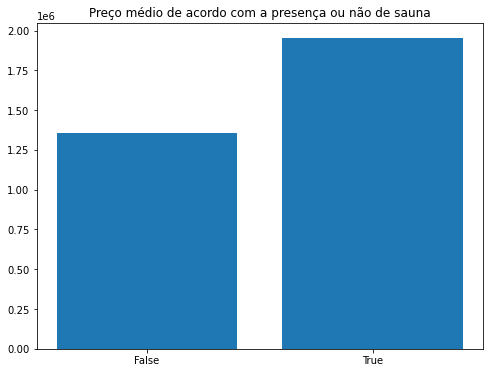

In [48]:
dadossauna=dadosvendasemoutlier.groupby("Sauna")["PrecoDeVenda"].mean().reset_index()
presencasauna=["False","True"]
precomedio=dadossauna["PrecoDeVenda"]
plt.figure(figsize=(8,6))
plt.bar(presencasauna,precomedio)
plt.title("Preço médio de acordo com a presença ou não de sauna")
plt.show()

Ao se analisar o gráfico de barras,é possivel observar que os imóveis com sauna são em média bem mais caros do que aqueles que não possuem,sendo diferença de aproximadamente 30% . 
Analisamos até então características no imóvel que infleunciam no valor de venda . Por fim,analisarei o preço médio agora por localidade,primeiramente conhecendo as cidades mais baratas,as cidade mais caras,e então,saberei quais o preço médio por estado. 

In [50]:
cidadesmaisbaratas=dadosvendasemoutlier.groupby(["CidadeDoImovel","EstadoDoImovel"])["PrecoDeVenda"].mean().sort_values().reset_index().head(10)
cidadesmaisbaratas.columns=["Cidade","Estado","Preço Médio"]
cidadesmaisbaratas

,Cidade,Estado,Preço Médio
0,Portão,Rio Grande do Sul,70000.0
1,Sarandi,Paraná,105000.0
2,Fazenda Rio Grande,Paraná,120000.0
3,Anápolis,Goiás,130000.0
4,Francisco Morato,São Paulo,140000.0
5,Mesquita,Rio de Janeiro,150000.0
6,Itaguaí,Rio de Janeiro,150000.0
7,Serra,Espírito Santo,150000.0
8,Iperó,São Paulo,160000.0
9,Magé,Rio de Janeiro,160000.0


Ao se observar a tabela das cidades mais baratas para se comprar um imóvel,pode-se verificar que as três cidade com o menor preço médio são Portão,Sarandi,e Fazenda Rio Grande. Além disso,outros fatores interessantes é que o top  3 das cidades mais baratas para se comprar um imóvel de acordo com o dataset  estão na região sul,e nota-se também a forte presença da região sudeste no top 10,com 6 presenças . Agora pode-se conhecer as cidades com o maior preço médio de acordo com o dataset .

In [55]:
cidadesmaiscara=dadosvendasemoutlier.groupby(["CidadeDoImovel","EstadoDoImovel"])["PrecoDeVenda"].mean().sort_values(ascending=False).reset_index().head(10)
cidadesmaiscara.columns=["Cidade","Estado","PreçoMédio"]
cidadesmaiscara

,Cidade,Estado,PreçoMédio
0,Mata de São João,Bahia,4.700000e+06
1,Cabo de Santo Agostinho,Pernambuco,4.250000e+06
2,Nova Lima,Minas Gerais,3.017141e+06
3,Barueri,São Paulo,2.833596e+06
4,Santana de Parnaíba,São Paulo,2.508814e+06
5,Vitória,Espírito Santo,2.368400e+06
6,Itatiaia,Rio de Janeiro,2.350000e+06
7,Campos do Jordão,São Paulo,2.330000e+06
8,Balneário Camboriú,Santa Catarina,2.330000e+06
9,Uberlândia,Minas Gerais,2.145000e+06


Ao se observar a tabela das cidades com maior preço médio,pode-se observar que as cidades com maior preço médio são Mata de São João,Cabo de Santo Agostinho,e Nova Lima . Além disso,nota-se que o estado de São Paulo possui 3 presenças no top 10,com as cidades de Barueri,Santana de Parnaiba,e Campos de Jordão . Pode-se observar a forte presença de estados do Sudeste,com 7 presenças no total no top 10 . Estranhamente,a cidade de Mata de São João é a cidade mais cara para se comprar um imóvel d acordo com o dataset,pode-se observar então o que faz com que Mata de Mata de  João João seja a com maior preço médio filtrando as observações dessa cidade  . Porém,é possível observar a presença de cidades bastante conhecidas,tais como,Barueri,Vitória,Campos do Jordão,Balneário Camboriú,e Uberlândia . 

In [57]:
dadosvendasemoutlier[dadosvendasemoutlier["CidadeDoImovel"]=="Mata de São João"]

,PrecoDeVenda,CidadeDoImovel,EstadoDoImovel,NumeroDeBanheiros,NumeroDeQuartos,Jardim,AreaUtilizavel,Sauna,TipoDoImovel,VagasDeEstacionamento
31808,4700000,Mata de São João,Bahia,7,6,False,397,False,casas-de-condominio,4


Ao se analisar os dados da cidade de Mata de São João,é possivel observar que existe apenas uma observação,ou seja,a amostra  não é tão significativa sobre o preço médio de venda nesta cidade,logo não é possível tirar uma conclusão com apenas uma amostra  . Outro fator que faz com que seja a cidade com maior preço médio,é que o único imóvel a venda possui número de quartos e de quartos significativo,e área utilizável é bem alta,de 397 m2,o que conforme vimos tem uma correlação forte positiva com o preço do imóvel . 

In [ ]:
Então,verificaremos agora o preço médio de venda dos imóveis de acordo com o estado em que estão localizados . 

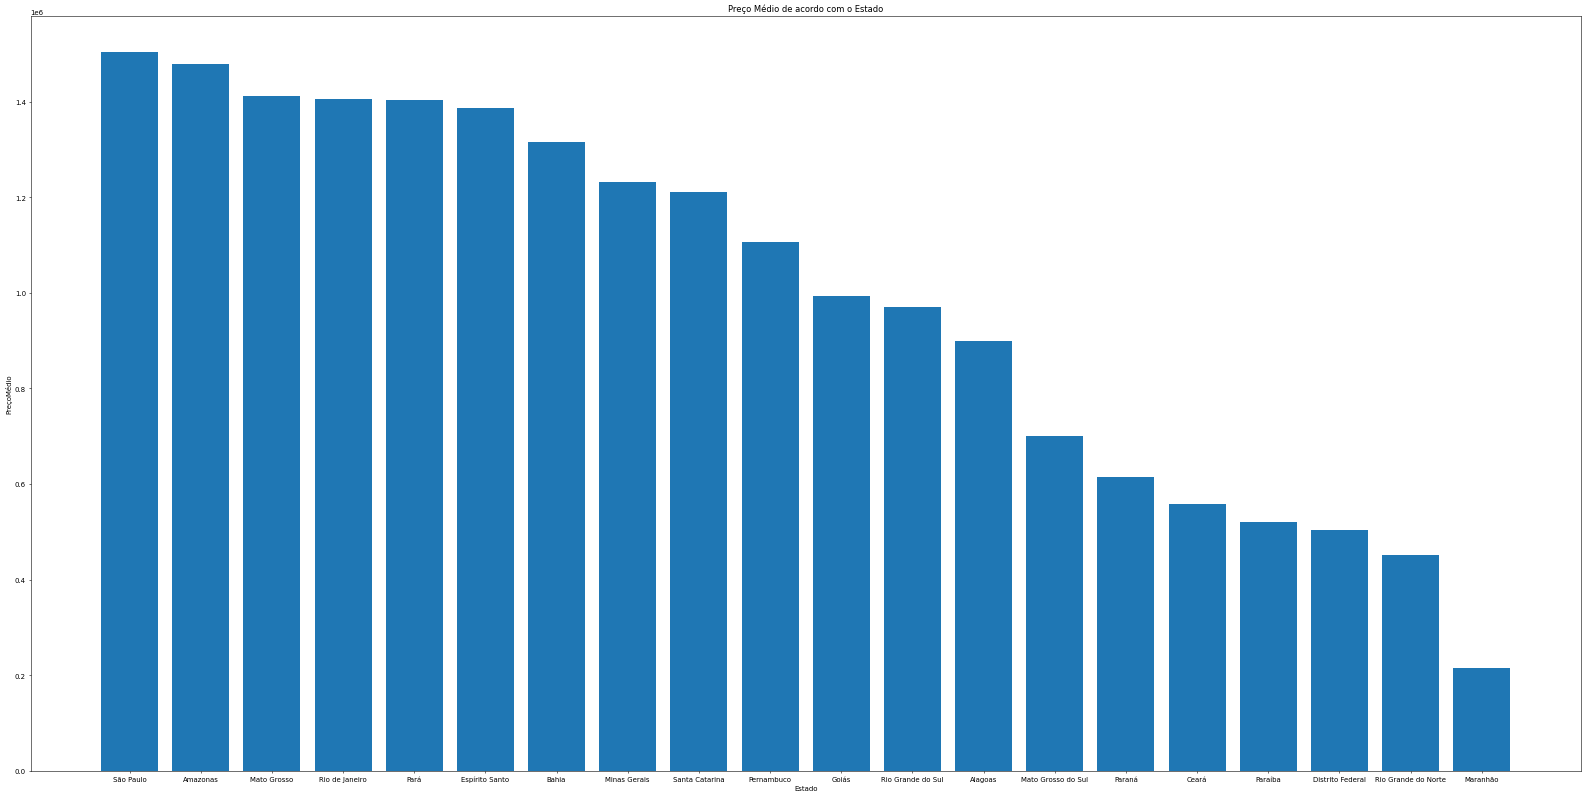

In [61]:
precomedioporestado=dadosvendasemoutlier.groupby("EstadoDoImovel")["PrecoDeVenda"].mean().sort_values(ascending=False).reset_index()
estado=precomedioporestado["EstadoDoImovel"]
precomedio=precomedioporestado["PrecoDeVenda"]
plt.figure(figsize=(40,20),dpi=50)
plt.bar(estado,precomedio)
plt.xticks(estado)
plt.xlabel("Estado")
plt.ylabel("PreçoMédio")
plt.title("Preço Médio de acordo com o Estado")
plt.show()

Ao se analisar o gráfico "Preço Médio de acordo com o estadoo",pode-se notar que os estados com maior preço médio de venda é São Paulo,Amazonas,e Mato Grosso do Sul . Enquanto que Maranhão,Rio Grande do Norte,Distrito federal tem um preço médio menor .

**Conclusão :**

Portanto,nesse estudo,o objetivo foi tentar responder a pergunta "Quais fatores influenciam no preço de venda de um imóvel ? " . Através de análise estatistica,foi possivel observar que a área utilizável tem uma relação forte com o preço do imóvel,onde quanto maior a ela for maior será o preço . E também,existe uma certa relação do preço com o número de quartos e número de banheiros,onde de maneira moderada,o aumento delas pode influenciar no aumento do preço . Pode-se observar também que outras características do imóvel,tais como,presença de jardim e/ou de sauna também influenciam no aumento do preço . Em termos de localidade,não foi possível tirar uma conclusão muito interessante sobre o preço em relação a cidade ,pois a cidade com maior preço tem apenas uma amostra . Já em relação aos estados ,foi possivel observar que o estado com preço médio maior foi o estado de São Paulo,enquanto que o estado com preço médio menor foi Maranhão . 